<a href="https://colab.research.google.com/github/Raffaycodes/Seismic-P-wave-Detection/blob/main/P_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install obspy


Stream loaded:
 1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
Noise level: 81.54757050107551
Threshold: 407.73785250537753
P‑wave pick (s since start): 663.6


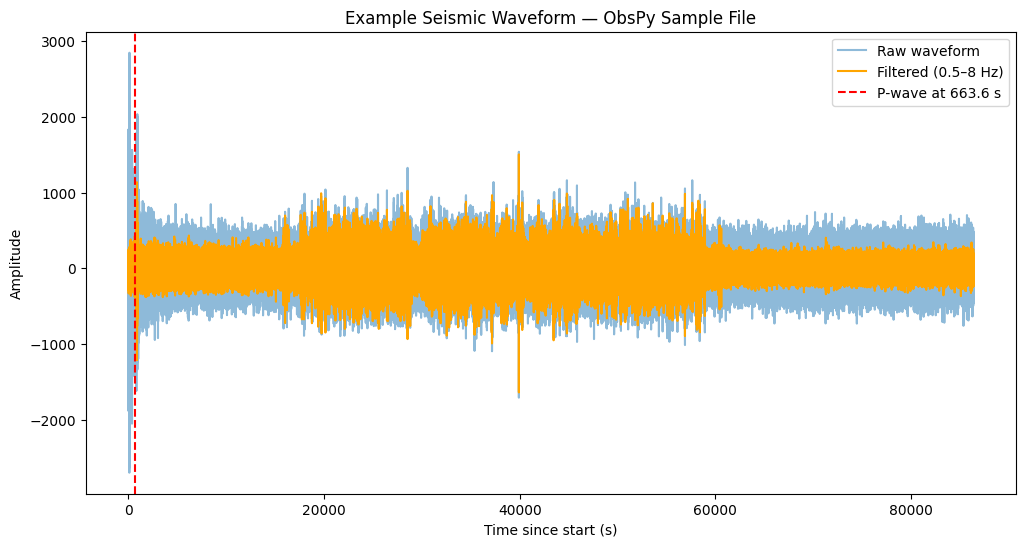

In [ ]:
# =========================================================
# INSTALL & IMPORT
# =========================================================
!pip install obspy

from obspy import read
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# PART 1 — LOAD A REAL EXAMPLE SEISMIC WAVEFORM
# =========================================================
# This URL points to a valid ObsPy example MiniSEED file
url = "https://examples.obspy.org/COP.BHZ.DK.2009.050"

st = read(url)
trace = st[0]
print("Stream loaded:\n", st)

# =========================================================
# PART 2 — FILTER THE DATA
# =========================================================
st_f = st.copy()
# Apply a bandpass filter to keep earthquake frequencies
st_f.filter("bandpass", freqmin=0.5, freqmax=8.0, corners=4, zerophase=True)

trace_f = st_f[0]
t = trace_f.times()      # time in seconds
data = trace_f.data       # filtered amplitude

# =========================================================
# PART 3 — SIMPLE P‑WAVE PICKING
# =========================================================
# Estimate noise from the first ~30 seconds
noise_idx = t < 30
noise_level = np.std(data[noise_idx])
threshold = 5 * noise_level

indices = np.where(np.abs(data) > threshold)[0]
p_time = None
if len(indices) > 0:
    p_index = indices[0]
    p_time = t[p_index]

print("Noise level:", noise_level)
print("Threshold:", threshold)
print("P‑wave pick (s since start):", p_time)

# =========================================================
# PART 4 — PLOT RAW & FILTERED + PICK
# =========================================================
raw_data = trace.data

plt.figure(figsize=(12,6))
plt.plot(t, raw_data, label="Raw waveform", alpha=0.5)
plt.plot(t, data, label="Filtered (0.5–8 Hz)", color="orange")

if p_time is not None:
    plt.axvline(p_time, color='red', linestyle='--', label=f"P‑wave at {p_time:.1f} s")

plt.xlabel("Time since start (s)")
plt.ylabel("Amplitude")
plt.title("Example Seismic Waveform — ObsPy Sample File")
plt.legend()
plt.show()

plt.savefig("P_wave_plot.png", dpi=300)  # This saves the figure as a PNG file
plt.show()
